1. **Imports & Dependencies:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

2. **Loading the Dataset:**

In [2]:
file_path = "SMSSpamCollection"
# Load the file as a tab-separated values (TSV) file
df = pd.read_csv(file_path, sep='\t', header=None, names=["Label", "Message"])

df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Encoding the Labels:**

In [3]:
print(df["Label"].value_counts())
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})
df.head()

Label
ham     4825
spam     747
Name: count, dtype: int64


,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- **Data Cleaning Steps:** If stopwords and punctuation removal are intended, a clear function should be defined for preprocessing text.

In [4]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words and len(word) >1]  # Remove stopwords
    return " ".join(words)

In [5]:
df['Processed_Message'] = df['Message'].apply(preprocess_text)
df.head()

,Label,Message,Processed_Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...
3,0,U dun say so early hor... U c already then say...,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


- **Ploting Word Clouds:** Ploting Word Clouds for Ham and Spam . 

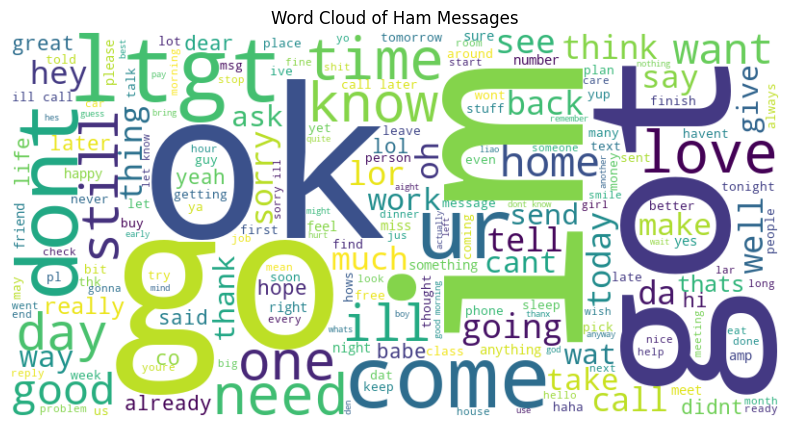

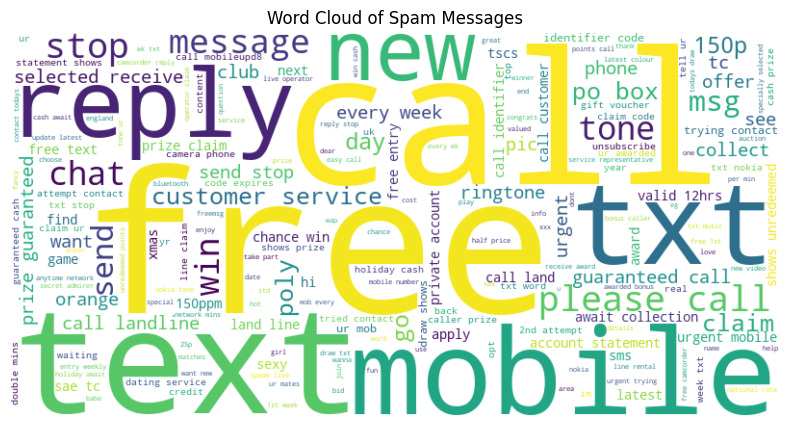

In [6]:
for label, category in zip([0, 1], ['Ham', 'Spam']):
    text = " ".join(df[df['Label'] == label]['Processed_Message'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud of {category} Messages")
    plt.show()

- **Word Count Distribution**

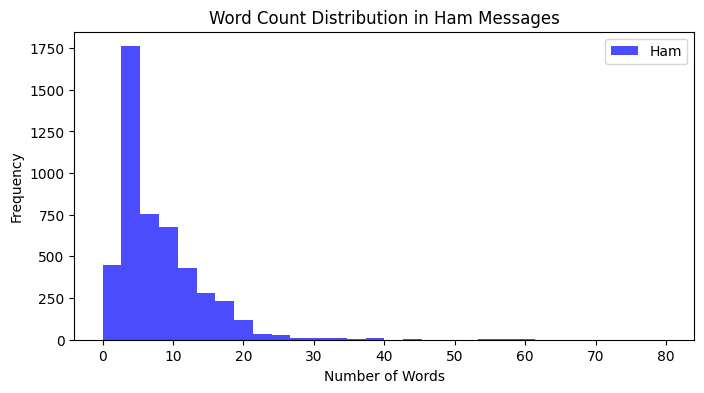

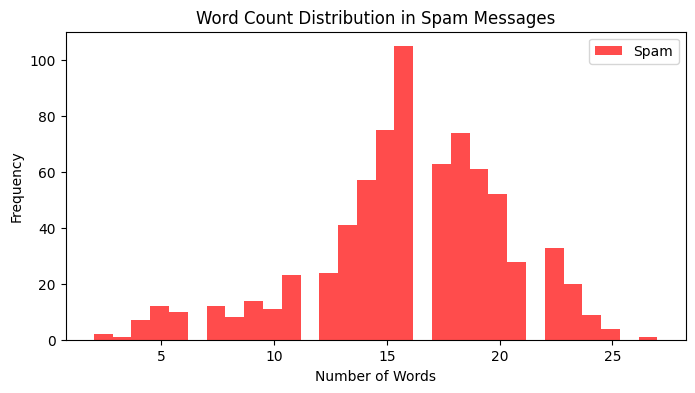

In [7]:
df['Word_Count'] = df['Processed_Message'].apply(lambda x: len(word_tokenize(str(x))))

plt.figure(figsize=(8, 4))
df[df['Label'] == 0]['Word_Count'].plot(kind='hist', bins=30, alpha=0.7, color='blue', label='Ham')
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Word Count Distribution in Ham Messages")
plt.legend()
plt.show()
plt.figure(figsize=(8, 4))
df[df['Label'] == 1]['Word_Count'].plot(kind='hist', bins=30, alpha=0.7, color='red', label='Spam')
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Word Count Distribution in Spam Messages")
plt.legend()
plt.show()

In [8]:
spam_n, ham_n = len(df[df['Label'] == 1]), len(df[df['Label'] == 0])
print(f"Percentage of spam Message = {round((spam_n)/(spam_n + ham_n) * 100, 2)}%")
print(f"Percentage of ham Message = {round((ham_n)/(spam_n + ham_n) * 100, 2)}%")


Percentage of spam Message = 13.41%
Percentage of ham Message = 86.59%


In [9]:
df_final = df[['Label', 'Processed_Message']].rename(columns={'Processed_Message': 'Message'})
df_final.drop_duplicates(inplace=True)
df_final.dropna().reset_index(drop=True)
df_final.head()

,Label,Message
0,0,go jurong point crazy available bugis great wo...
1,0,ok lar joking wif oni
2,1,free entry wkly comp win fa cup final tkts 21s...
3,0,dun say early hor already say
4,0,nah dont think goes usf lives around though


In [10]:
df_train, df_temp = train_test_split(df_final, train_size=0.75, random_state=21, stratify=df_final['Label'])
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=21, stratify=df_temp['Label'])
print("Train shape:", df_train.shape, "Validation shape:", df_val.shape, "Test shape:", df_test.shape)

Train shape: (3829, 2) Validation shape: (638, 2) Test shape: (639, 2)


- **3. Saving the splits **

In [11]:
df_train.to_csv("train.csv", index=False)
df_val.to_csv("validation.csv", index=False)
df_test.to_csv("test.csv", index=False)